In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
  


-36

In [2]:

  
# # fetch dataset 
# individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# # data (as pandas dataframes) 
# df = individual_household_electric_power_consumption.data.features
# # y = individual_household_electric_power_consumptiodata.targets  

# X = df.copy()


### Run This


df = pd.read_csv('household_power_consumption.csv',low_memory=False)

In [3]:
# df.to_csv('household_power_consumption.csv', index=False)

In [4]:
format_code = "%d/%m/%Y %H:%M:%S"
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format=format_code)


In [5]:
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True) # Fill NaNs with mean




/var/folders/0t/5lm7h_6s6qq4j86y_q6lq9880000gp/T/ipykernel_99149/3902033035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True) # Fill NaNs with mean


In [6]:
print("Number of records with '?' in Voltage:", len(df[df['Voltage']=='?']))
print("\nExample rows:")
print(df[df['Voltage']=='?'].head())


Number of records with '?' in Voltage: 25979

Example rows:
             Date      Time Global_active_power Global_reactive_power Voltage  \
6839   21/12/2006  11:23:00                   ?                     ?       ?   
6840   21/12/2006  11:24:00                   ?                     ?       ?   
19724  30/12/2006  10:08:00                   ?                     ?       ?   
19725  30/12/2006  10:09:00                   ?                     ?       ?   
41832   14/1/2007  18:36:00                   ?                     ?       ?   

      Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  \
6839                 ?              ?              ?        6.458447   
6840                 ?              ?              ?        6.458447   
19724                ?              ?              ?        6.458447   
19725                ?              ?              ?        6.458447   
41832                ?              ?              ?        6.458447   

                 Dat

In [7]:
## Drop all records where any columns have '?'
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [8]:
### Convert object columns to numeric

columns_to_convert = ['Global_active_power', 'Global_reactive_power',
  'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
  'Sub_metering_3']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

/var/folders/0t/5lm7h_6s6qq4j86y_q6lq9880000gp/T/ipykernel_99149/2845848522.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='DateTime')[col].mean()


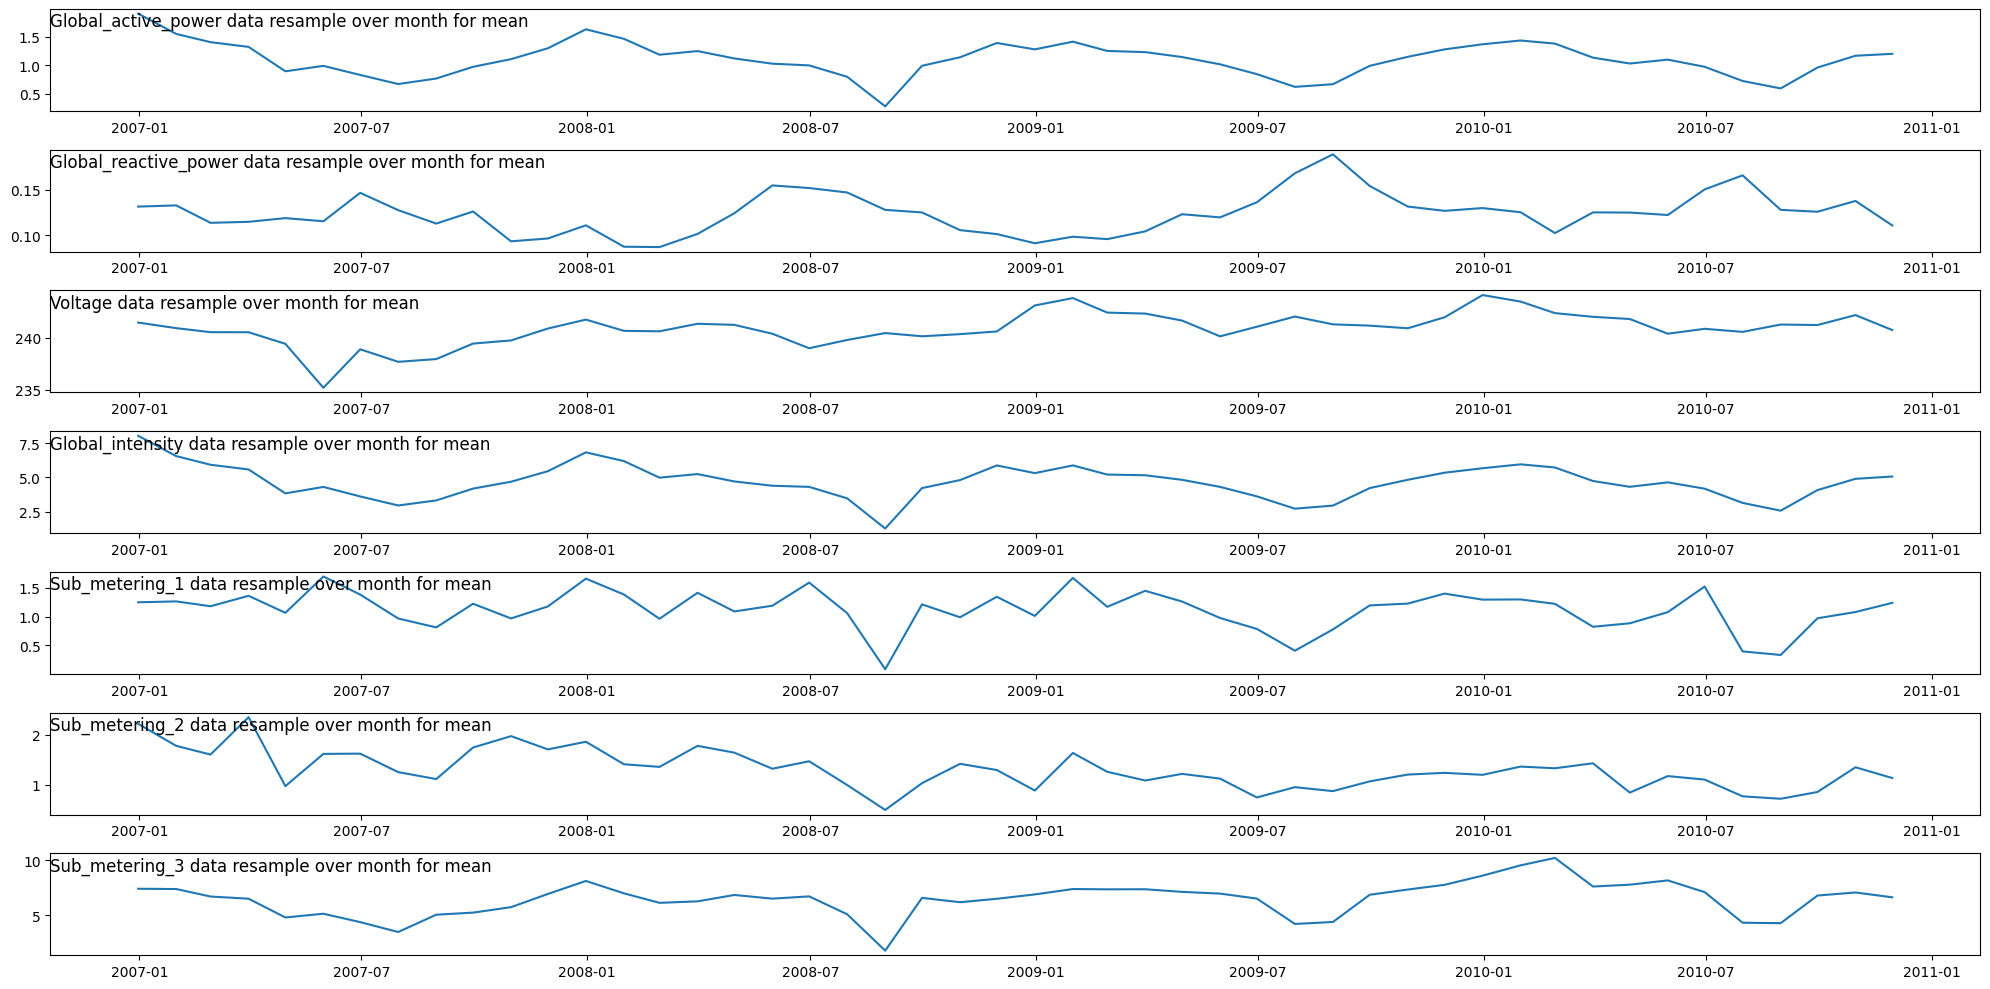

In [9]:
i = 1
cols = ['Global_active_power', 'Global_reactive_power',
  'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
  'Sub_metering_3']
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    monthly_data = df.resample('M', on='DateTime')[col].mean()
    plt.plot(monthly_data.index, monthly_data.values)
    plt.title(col + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.tight_layout()
plt.show()

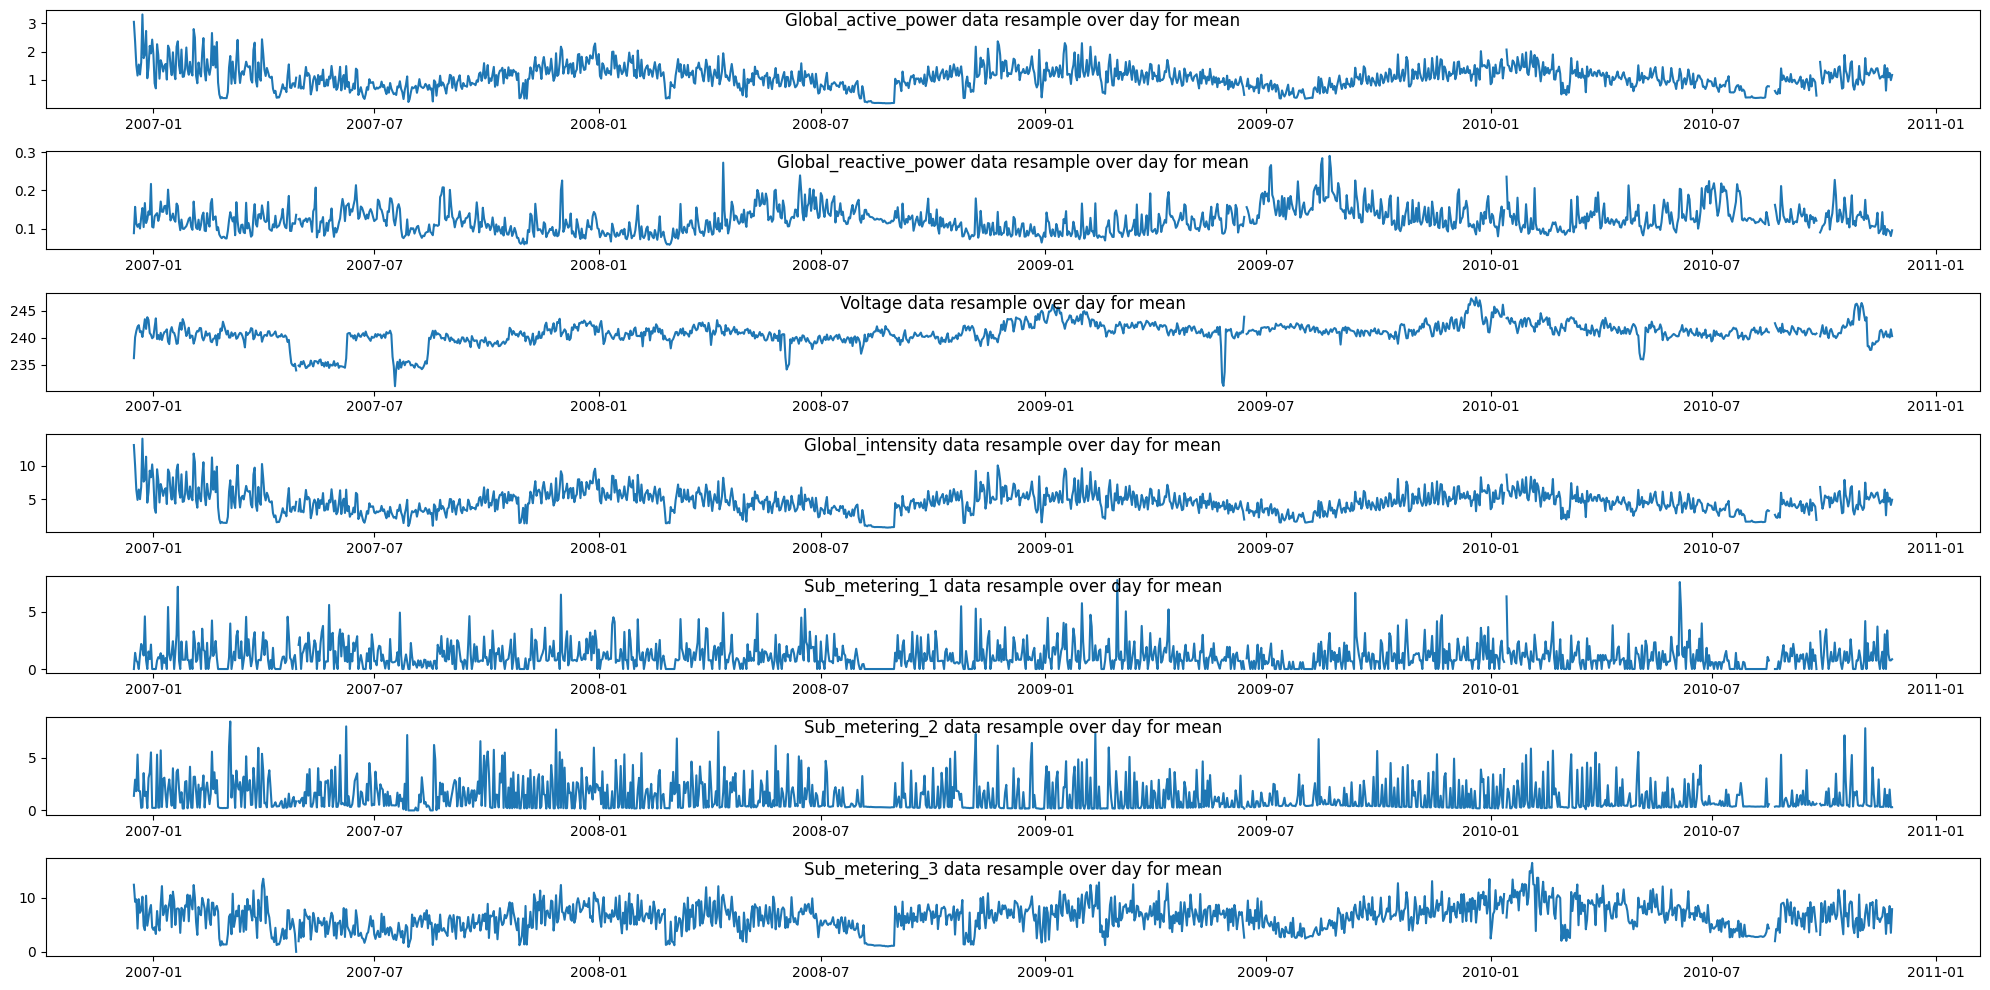

In [10]:
i = 1 
cols = ['Global_active_power', 'Global_reactive_power',
  'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
  'Sub_metering_3']
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    daily_mean = df.resample('D', on='DateTime')[col].mean()
    plt.plot(daily_mean.index, daily_mean.values)
    plt.title(col + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.tight_layout()
plt.show()


In [11]:
print(f'Data set size: {df.shape}')

Data set size: (2049280, 10)


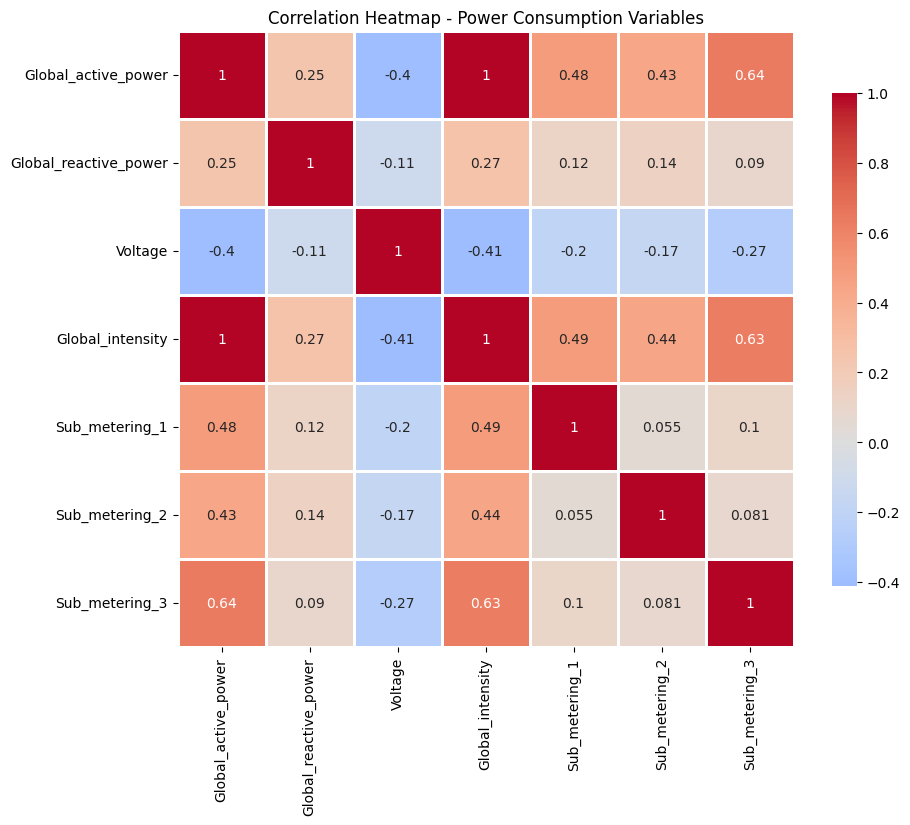

In [12]:
# df_sample = df.sample(n=100000, random_state=42)

# correlation_matrix = df_sample[columns_to_convert].corr()
correlation_matrix = df[columns_to_convert].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Power Consumption Variables')
plt.show()

In [15]:
# Get correlation with Global_active_power specifically
correlations = df[columns_to_convert].corr()['Global_active_power'].sort_values(ascending=False)
print("Pearson Correlation with Global_active_power:")
print(correlations)

Pearson Correlation with Global_active_power:
Global_active_power      1.000000
Global_intensity         0.998889
Sub_metering_3           0.638555
Sub_metering_1           0.484401
Sub_metering_2           0.434569
Global_reactive_power    0.247017
Voltage                 -0.399762
Name: Global_active_power, dtype: float64


In [19]:
columns_to_convert.append('DateTime')

/var/folders/0t/5lm7h_6s6qq4j86y_q6lq9880000gp/T/ipykernel_99149/2079359026.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfm = df[columns_to_convert].set_index('DateTime').resample('M').mean()
/var/folders/0t/5lm7h_6s6qq4j86y_q6lq9880000gp/T/ipykernel_99149/2079359026.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfh = df[columns_to_convert].set_index('DateTime').resample('H').mean()


Text(0.5, 1.0, 'Hourly resampling')

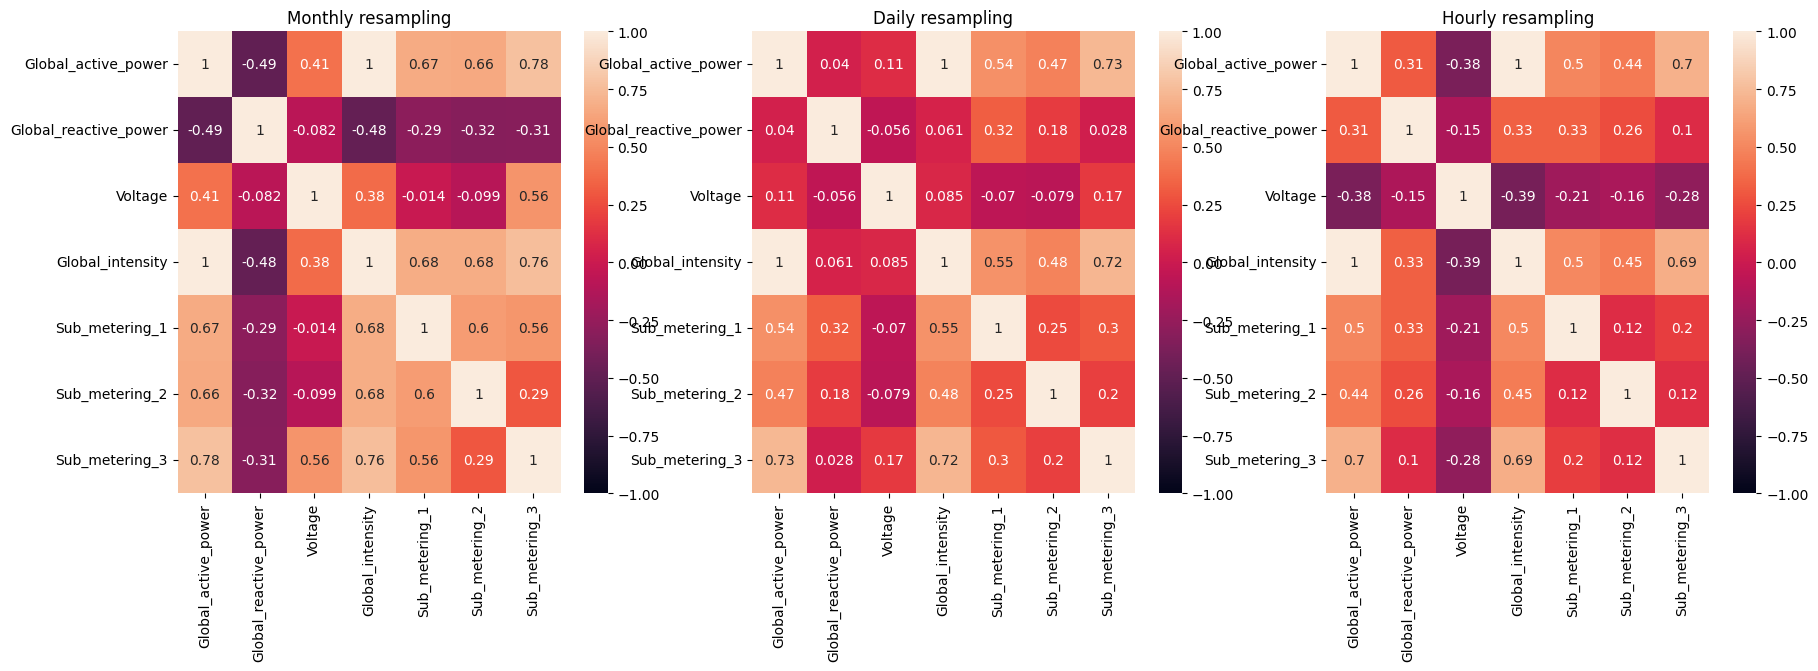

In [22]:
f = plt.figure(figsize=(21,6))

ax = f.add_subplot(131)
dfm = df[columns_to_convert].set_index('DateTime').resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax = f.add_subplot(132)
dfd = df[columns_to_convert].set_index('DateTime').resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)  

ax = f.add_subplot(133)
dfh = df[columns_to_convert].set_index('DateTime').resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)